+  **Author : YASHWANTH**
+   **DATE   : 6/01/2023**
+  **Reg.No : ME22MTECH11019**

## Problem: NEWTON_RAPHSON
+ **Find square-root of 10:**
\begin{equation} x = \sqrt{10}  \end{equation}

+ **Polynomial equation:**
\begin{equation} [ x^2 - 10 = 0 = f(x)] --->(1) \end{equation}

In [1]:
import numpy as np
import scipy as sp
import numpy.polynomial.polynomial as root
import math as mt
import pandas as pd
import matplotlib.pyplot as plt

+ **Excat solutions:**
  + using:   np.polynomial.polynomial.polyroots(coeff_array)
     + coeff_array = **(c, b, a)**
     for $ax^2+bx+c=0$
  + using math.sqrt() function

In [2]:
coeff = (-10,0,1)
excat_root = np.polynomial.polynomial.polyroots(coeff)
print(excat_root, mt.sqrt(10))

[-3.16227766  3.16227766] 3.1622776601683795


### Defining function and its derivative:

#### Newton-Raphson Method:
+ For single variable function:
\begin{equation} x_(n+1) = x_n - \frac{f(x_n)}{f'(x_n)}  \end{equation}

In [3]:
def fun(b):
    return (b**2-10)
def dfun(b):
    return (2*b)

#### Max_Iteration condition:

In [4]:
def SolveNS(p,n):
    store = []
    error = []
    temp  = 0
    for i in range(0,n,1):
        a1 = fun(p)
        a2 = dfun(p)
        p = p -(a1/a2)
        store.append(p)
        error.append(np.abs(p-temp))
        temp = p
    return (store,error)

#### Max_Error condition:

In [5]:
def solveNS(p,e_max):
    store = []
    error = []
    temp  = 0
    e=1
    while(e>e_max):
        a1 = fun(p)
        a2 = dfun(p)
        p = p -(a1/a2)
        store.append(p)
        e = np.abs(p-temp)
        error.append(e)
        temp = p
    return (store,error)

### Solving:

#### Max_Iteration condition:

In [13]:
intial_guess   = 3
max_iter = 10
ss, error = SolveNS(intial_guess,max_iter)

#### Max_Error condition:

In [14]:
intial_guess   = 3
max_error = 1e-10
ss2, error2 = solveNS(intial_guess,max_error)

In [34]:
dict1 = {"x_values":ss,"errors": error}
df = pd.DataFrame(dict1,index=(np.arange(1,max_iter+1,1)))
ERROR_I = np.abs(ss[len(ss)-1]-mt.sqrt(10))

print(df)
print("\nMAX_ITERATION:",ERROR_I)
print("Converged sol: ", ss[len(ss)-1])
print("Excat sol: ", mt.sqrt(10))

    x_values        errors
1   3.166667  3.166667e+00
2   3.162281  4.385965e-03
3   3.162278  3.041585e-06
4   3.162278  1.462830e-12
5   3.162278  4.440892e-16
6   3.162278  4.440892e-16
7   3.162278  4.440892e-16
8   3.162278  4.440892e-16
9   3.162278  4.440892e-16
10  3.162278  4.440892e-16

MAX_ITERATION: 0.0
Converged sol:  3.1622776601683795
Excat sol:  3.1622776601683795


In [33]:
dict2 = {"x_values2":ss2,"errors2": error2}
df2 = pd.DataFrame(dict2)
ERROR = np.abs(ss2[len(ss2)-1]-mt.sqrt(10))

print(df2)
print()
print("MAX_ERROR:", ERROR )
print("Converged sol: ", ss2[len(ss2)-1])
print("Excat sol: ", mt.sqrt(10))

   x_values2       errors2
0   3.166667  3.166667e+00
1   3.162281  4.385965e-03
2   3.162278  3.041585e-06
3   3.162278  1.462830e-12

MAX_ERROR: 0.0
Converged sol:  3.1622776601683795
Excat sol:  3.1622776601683795


### Plotting:

In [17]:
%matplotlib inline
%config InlineBackend.fig_format = 'svg'

#### Max_Iteration condition:

Text(0.5, 0, 'No.Iterations')

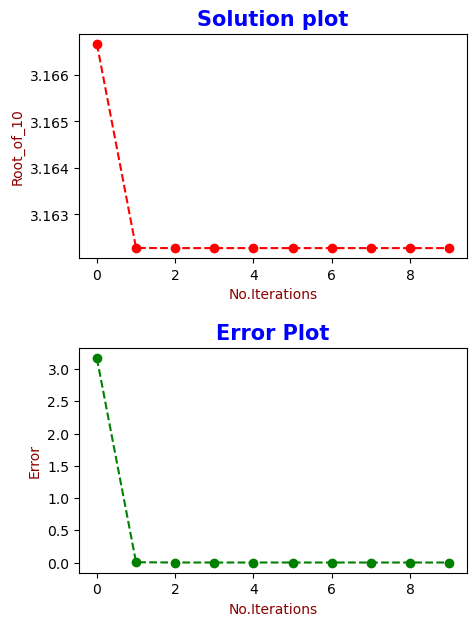

In [18]:
plt.figure(figsize=(5,7))

# Solution-plot
fig1 = plt.subplot(2,1,1)
plt.plot(np.arange(0,max_iter,1),ss, "r--o")
plt.title("Solution plot", fontweight ="bold", fontsize=15,color="b")
plt.ylabel("Root_of_10", fontsize=10,color="darkred")
plt.xlabel("No.Iterations", fontsize=10,color="darkred")
plt.subplots_adjust(hspace=0.4)

# Error-plot
plt.subplot(2,1,2)
plt.plot(np.arange(0,max_iter,1),error,"g--o")
plt.title("Error Plot", fontweight ="bold", fontsize=15,color="b")
plt.ylabel("Error", fontsize=10,color="darkred")
plt.xlabel("No.Iterations", fontsize=10,color="darkred")


#### Max_Error condition:

Text(0.5, 0, 'No.Iterations')

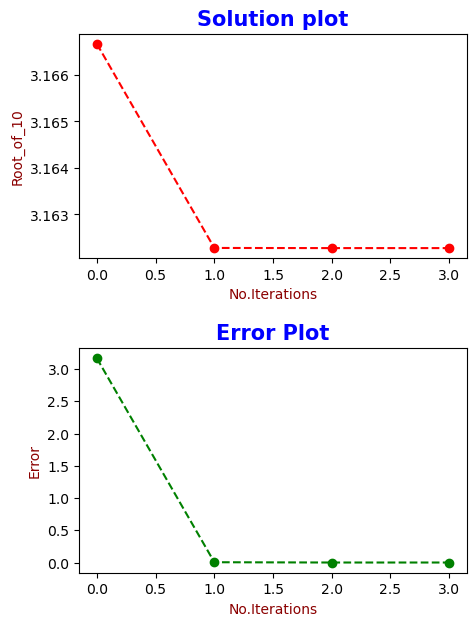

In [19]:
plt.figure(figsize=(5,7))

# Solution-plot
fig1 = plt.subplot(2,1,1)
plt.plot(np.arange(0,len(ss2),1),ss2, "r--o")
plt.title("Solution plot", fontweight ="bold", fontsize=15,color="b")
plt.ylabel("Root_of_10", fontsize=10,color="darkred")
plt.xlabel("No.Iterations", fontsize=10,color="darkred")
plt.subplots_adjust(hspace=0.4)

# Error-plot
plt.subplot(2,1,2)
plt.plot(np.arange(0,len(error2),1),error2,"g--o")
plt.title("Error Plot", fontweight ="bold", fontsize=15,color="b")
plt.ylabel("Error", fontsize=10,color="darkred")
plt.xlabel("No.Iterations", fontsize=10,color="darkred")

### Observation:
+ **Solution** for **equation(1)** seems to converge after nearly **three-iteratrions**.
+ **Error value** is also seems to converge after **third iteration**.
+ Although solution and erros seems to converege after three iterations, it is **not true** and **small oscialltions** can be observed in easily in error values after third iteration.

### Further think:
+ Find **order of convergence** by first finding different **error ratios**!
   + NS-is **2nd-order** convergence.